## About the Dataset

The Traffic, Driving Style and Road Surface Condition dataset contains parameters acquired by two types of car (Peugeot 207 1.4 HDi and Opel Corsa 1.3 HDi), via OBD-II and through the micro-devices embedded in the user smartphone, with the goal of accurately characterizing the overall system composed by driver, vehicle and environment. The dataset is used in machine learning to predict road surface, traffic and driving style.

The dataset contains 14 numeric input features and 3 categorical output features.

## Objective

The goals of this assignment are as follows:

- Analyse the dataset
- Clean the dataset
- Compare two classification algorithms
- Train two classifier methods and compare the results

## Import Python Libraries

In [1]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd
from glob import glob

# for plotting
import seaborn as sns 

# for learning algorithms
import sklearn

# for encoding categorical variables
import sklearn.preprocessing as pre

# for k-Nearest Neighbors
import sklearn.neighbors as nei

# for splitting into training and test sets
import sklearn.model_selection as mod

%matplotlib inline

## Load the CSV Files into Pandas

### Open Corsa 01 CSV

In [2]:
# read in opel_corsa_01 csv file
corsa_01 = pd.read_csv("opel_corsa_01.csv", sep=";")
# display the first 5 rows of the dataframe
corsa_01.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


### Opel Corsa 02 CSV

In [3]:
# read in opel_corsa_02 csv file
corsa_02 = pd.read_csv("opel_corsa_02.csv", sep=";")
# display the first 5 rows of the dataframe
corsa_02.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,44,0.599976,3.828060,8.147763,25.316045,-1.576261,7.1411,46.274509,42,99,899,6.20,19,16.9427,35.635880,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,45,0.600037,5.629500,8.234082,24.411716,1.801440,6.9776,56.470589,42,101,1066,10.96,19,17.0199,36.048752,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,46,0.700012,8.106480,8.346672,23.596122,2.476980,7.1102,34.509804,42,102,1629,10.93,22,17.0740,36.117695,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,47,0.699951,9.232380,8.466768,22.917750,1.125900,7.1609,27.843138,42,103,1629,12.85,22,17.0855,36.160938,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,48,0.500000,11.709359,8.643159,22.150958,2.476979,7.2194,4.705883,42,104,1849,14.82,22,17.0393,36.187778,SmoothCondition,LowCongestionCondition,EvenPaceStyle


### Peugeot 01 CSV

In [4]:
# read in peugeot_207_01 csv file
peugeot_01 = pd.read_csv("peugeot_207_01.csv", sep=";")
# display the first 5 rows of the dataframe
peugeot_01.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-13.399994,20.699999,6.060,115.840061,-4.500000,1.0548,38.039215,31.0,101.0,798.0,6.22,15.0,-0.5982,27.919697,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-13.200005,17.100000,6.345,117.200816,-3.599998,0.9012,38.039215,31.0,101.0,797.5,6.27,15.0,-0.5244,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-13.200005,14.400000,6.585,117.559595,-2.700001,0.9331,90.588234,32.0,101.0,797.5,6.27,15.0,-0.5068,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,-11.800003,14.400000,6.825,117.801222,0.000000,0.9878,90.588234,32.0,101.0,726.0,8.63,15.0,-0.4882,26.004126,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,-19.800003,14.400000,7.065,117.925697,0.000000,1.1316,92.941177,32.0,101.0,784.0,8.88,15.0,-0.6712,25.295498,SmoothCondition,LowCongestionCondition,EvenPaceStyle


### Peugeot 02 CSV

In [5]:
# read in peugeot_207_02 csv file
peugeot_02 = pd.read_csv("peugeot_207_02.csv", sep=";")
# display the first 5 rows of the dataframe
peugeot_02.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-0.599998,24.299999,8.720689,46.843772,6.299999,-1.2903,67.058823,26,115,1809.0,22.360001,15,0.1468,28.784592,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
1,60,0.099998,27.900000,9.045762,52.270798,3.600000,-1.4038,0.000000,26,107,947.5,23.129999,17,0.2022,28.728073,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
2,61,-0.200001,30.599998,9.405000,59.127937,2.699999,-1.3209,28.235294,26,103,797.0,10.130000,17,0.1834,27.799021,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
3,62,-0.899998,29.699999,9.900000,64.360674,-0.900000,-1.4974,0.000000,26,101,1112.0,6.050000,15,0.2099,26.150261,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
4,63,-0.900002,28.799999,10.380000,68.519589,-0.900000,-1.3275,71.764709,26,102,1150.0,11.740000,15,0.2898,25.721266,UnevenCondition,NormalCongestionCondition,EvenPaceStyle


## Data Preprocessing

Data preprocessing is a data mining technique that transforms raw data into a useful format. In this section the following steps will be carried out on the dataset:

- Merge 4 csv files into a single Pandas Dataframe
- Identify missing values
- Fill missing values with zero
- Check Data Types
- Analyse the Output Variables
- Select an output variable for evaluation
- Define inputs and output
- Standardise the data
- Fit and transform the data
- Encode the categorical variable
- Split the data into test and train
- Balance the categorical variable using oversampling
- Feature selection

## Merge the Four CSV Files

The 4 seperate csv files contained in the dataset need to be merged into one single Pandas dataframe.

In [7]:
# use glob() to list all files into a list called stock_files
stock_files = sorted(glob("data_file_*.csv"))

stock_files

['data_file_1.csv', 'data_file_2.csv', 'data_file_3.csv', 'data_file_4.csv']

In [8]:
# concat all files using pd.concat
df = pd.concat((pd.read_csv(file, sep=";").assign(filename = file)
          for file in stock_files), ignore_index = True)

In [9]:
df

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,filename
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.810000,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.650000,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.850000,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.210000,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.910000,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,4618,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81.0,115.0,1755.5,20.469999,25.0,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv
23771,4619,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81.0,106.0,736.5,17.740000,25.0,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv
23772,4620,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81.0,106.0,1254.0,9.520000,24.0,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv
23773,4621,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80.0,112.0,1254.0,14.910000,23.0,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv


In [10]:
# show the number of rows and colimns
df.shape

(23775, 19)

The combined dataset has 23775 rows and 19 columns.

### Missing Data

In [11]:
# check for any missing values in the dataset - a clean dataset is required for analysis
df.isnull().sum()

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    9
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   5
EngineCoolantTemperature     5
ManifoldAbsolutePressure     5
EngineRPM                    5
MassAirFlow                  5
IntakeAirTemperature         5
VerticalAcceleration         0
FuelConsumptionAverage       5
roadSurface                  0
traffic                      0
drivingStyle                 0
filename                     0
dtype: int64

There are 44 missing values. 44 missing values is a small amount so I will replace these missing values with zero.

In [12]:
# fill the missing values with zeros
df1 = df.fillna(0)
df1

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,filename
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.810000,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.650000,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.850000,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.210000,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.910000,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,4618,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81.0,115.0,1755.5,20.469999,25.0,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv
23771,4619,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81.0,106.0,736.5,17.740000,25.0,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv
23772,4620,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81.0,106.0,1254.0,9.520000,24.0,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv
23773,4621,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80.0,112.0,1254.0,14.910000,23.0,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle,data_file_4.csv


In [13]:
# check again for missing values
df1.isnull().sum()

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
filename                     0
dtype: int64

### Check Data Types

In [14]:
# check the data type of all the variables
df1.dtypes

Unnamed: 0                     int64
AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature     float64
ManifoldAbsolutePressure     float64
EngineRPM                    float64
MassAirFlow                  float64
IntakeAirTemperature         float64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
roadSurface                   object
traffic                       object
drivingStyle                  object
filename                      object
dtype: object

A mixture of datatypes - integers, floats and objects.

### Analysis of Output Variables

In [15]:
# count the number of categories in roadSurface variable
pd.value_counts(df1.roadSurface)

SmoothCondition         14237
UnevenCondition          6289
FullOfHolesCondition     3249
Name: roadSurface, dtype: int64

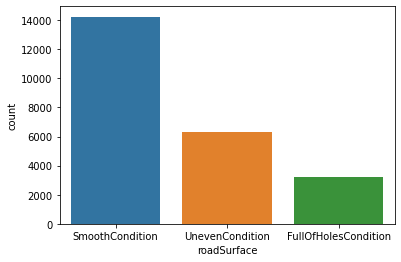

In [45]:
# visualize the output variable roadSurface
bar1 = sns.countplot(df2['roadSurface'])
bar1.set_xticklabels(['SmoothCondition','UnevenCondition', 'FullOfHolesCondition'])
plt.show()

The roadSurface output variable has three categories - SmoothCondition, UnevenCondition and FullOfHolesCondition. This output variable is unbalanced.

In [16]:
# count the number of categories in drivingStyle variable
pd.value_counts(df1.drivingStyle)

EvenPaceStyle      21016
AggressiveStyle     2759
Name: drivingStyle, dtype: int64

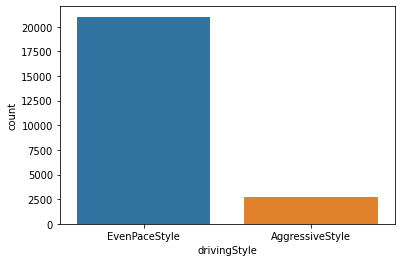

In [44]:
# visualize the output variable drivingStyle
bar2 = sns.countplot(df1['drivingStyle'])
bar2.set_xticklabels(['EvenPaceStyle','AggressiveStyle'])
plt.show()

The drivingStyle output variable has two categories - EvenPaceStyle and AggressiveStyle. This output variable is unbalanced.

In [17]:
# count the number of categories in traffic variable
pd.value_counts(df1.traffic)

LowCongestionCondition       17764
HighCongestionCondition       3017
NormalCongestionCondition     2994
Name: traffic, dtype: int64

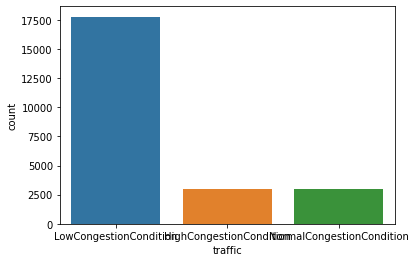

In [43]:
# visualize the output variable traffic
bar3 = sns.countplot(df1['traffic'])
bar3.set_xticklabels(['LowCongestionCondition','HighCongestionCondition', 'NormalCongestionCondition'])
plt.show()

The traffic output variable has three categories - LowCongestionCondition, HighCongestionCondition and NormalCongestionCondition. This output variable is unbalanced.

### Select Output Variable

The output variable selected for prediction is the roadSurface variable. The other two output variables will be dropped from the dataset.

In [46]:
# drop the first column, drivingStyle output column and traffic output column from the dataframe
df2 = df1.drop(columns=['Unnamed: 0', 'drivingStyle', 'traffic', 'filename'], axis=1)
# display the first 5 rows of corsa1
df2.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition


In [47]:
# count the number of categories in roadSurface variable
pd.value_counts(df2.roadSurface)

SmoothCondition         14237
UnevenCondition          6289
FullOfHolesCondition     3249
Name: roadSurface, dtype: int64

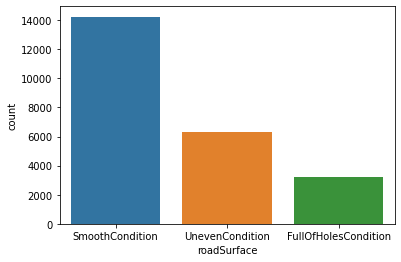

In [48]:
# visualize the output variable roadSurface
bar = sns.countplot(df2['roadSurface'])
bar.set_xticklabels(['SmoothCondition','UnevenCondition', 'FullOfHolesCondition'])
plt.show()

It can be seen from the bar chart that the output variable is extremely unbalanced. This will need to be rectified before training machine learning algorithms.

### Defining Inputs and Outputs

Classifier algorithms require inputs and outputs to be defined. I defined two variables - inputs and output. The inputs variable contains the 14 variables in the dataset and the output variable is the target variable roadSurface.

In [21]:
inputs = df2[['FuelConsumptionAverage', 'VerticalAcceleration', 'IntakeAirTemperature', 'MassAirFlow', 'EngineRPM', 'ManifoldAbsolutePressure', 'EngineCoolantTemperature', 'EngineLoad', 'LongitudinalAcceleration', 'VehicleSpeedVariation', 'VehicleSpeedVariance', 'VehicleSpeedAverage', 'VehicleSpeedInstantaneous', 'AltitudeVariation']]
outputs = df2['roadSurface']

In [22]:
inputs.head()

,FuelConsumptionAverage,VerticalAcceleration,IntakeAirTemperature,MassAirFlow,EngineRPM,ManifoldAbsolutePressure,EngineCoolantTemperature,EngineLoad,LongitudinalAcceleration,VehicleSpeedVariation,VehicleSpeedVariance,VehicleSpeedAverage,VehicleSpeedInstantaneous,AltitudeVariation
0,19.497335,-0.1133,24.0,15.81,1796.0,106.0,68.0,4.705883,0.3555,-2.476980,121.592690,13.223501,25.670519,-2.299988
1,19.515722,-0.1289,22.0,14.65,1689.0,103.0,68.0,10.588236,0.4492,-1.576260,120.422571,13.638919,24.094259,-2.099976
2,19.441765,-0.1328,21.0,11.85,1599.0,103.0,68.0,27.450981,0.4258,-1.351080,118.456769,14.031043,22.743179,-1.500000
3,19.388769,-0.0859,20.0,12.21,1620.0,104.0,69.0,24.313726,0.4140,-0.450359,117.571308,14.171073,22.292820,0.100037
4,19.301638,-0.0664,21.0,11.91,1708.0,104.0,69.0,20.000000,0.3945,1.351080,117.074149,14.328954,23.643900,0.099976


In [23]:
outputs

0        SmoothCondition
1        SmoothCondition
2        SmoothCondition
3        SmoothCondition
4        SmoothCondition
              ...       
23770    SmoothCondition
23771    SmoothCondition
23772    SmoothCondition
23773    SmoothCondition
23774    SmoothCondition
Name: roadSurface, Length: 23775, dtype: object

### Standardise the Data
The data in the dataset is not standardized as the variables have different distributions. The normal distribution is one of the most important concepts in statistics since nearly all statistical tests and models require normally distributed data. As a result, the data in this dataset should be standardized using the StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1. Standardization is important when comparing variables that have different distributions as it prevents bias.

In [24]:
# standardize the inputs
pre.scale(inputs)
inputs_scale=pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputs_scale

,FuelConsumptionAverage,VerticalAcceleration,IntakeAirTemperature,MassAirFlow,EngineRPM,ManifoldAbsolutePressure,EngineCoolantTemperature,EngineLoad,LongitudinalAcceleration,VehicleSpeedVariation,VehicleSpeedVariance,VehicleSpeedAverage,VehicleSpeedInstantaneous,AltitudeVariation
0,0.939455,-0.166547,0.047856,-0.023959,0.535090,-0.446908,-0.178399,-1.202915,-0.206069,-0.992322,-0.275398,-0.821469,-0.382671,-0.974063
1,0.943445,-0.171052,-0.135522,-0.143623,0.350095,-0.593101,-0.178399,-0.982127,-0.146874,-0.628458,-0.281801,-0.808132,-0.429215,-0.878419
2,0.927397,-0.172178,-0.227211,-0.432467,0.194491,-0.593101,-0.178399,-0.349202,-0.161657,-0.537492,-0.292558,-0.795543,-0.469110,-0.591517
3,0.915897,-0.158634,-0.318900,-0.395330,0.230799,-0.544370,-0.114772,-0.466956,-0.169111,-0.173629,-0.297403,-0.791048,-0.482409,0.173604
4,0.896990,-0.153003,-0.227211,-0.426277,0.382944,-0.544370,-0.114772,-0.628867,-0.181431,0.554098,-0.300123,-0.785979,-0.442513,0.173575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,-0.128005,-0.181795,0.139545,0.456759,0.465068,-0.008328,0.648751,-0.408079,-0.449108,1.462594,-0.627808,-0.329103,-0.290262,0.603957
23771,-0.126347,-0.191210,0.139545,0.175136,-1.296708,-0.446908,0.648751,-0.937970,-0.449866,0.735448,-0.628795,-0.330066,-0.237111,0.938689
23772,-0.134668,-0.167211,0.047856,-0.672826,-0.401989,-0.446908,0.648751,2.300251,-0.537049,-0.355270,-0.629491,-0.331029,-0.263686,0.986510
23773,-0.134769,-0.155775,-0.043833,-0.116802,-0.401989,-0.154521,0.585124,1.608449,-0.471346,0.008303,-0.633443,-0.333918,-0.263686,1.129969


In [25]:
# print the mean of each variable to 2 decimal places to check the standardisation has worked
inputs_scale.mean().round(2)

FuelConsumptionAverage       0.0
VerticalAcceleration         0.0
IntakeAirTemperature         0.0
MassAirFlow                 -0.0
EngineRPM                   -0.0
ManifoldAbsolutePressure    -0.0
EngineCoolantTemperature    -0.0
EngineLoad                  -0.0
LongitudinalAcceleration    -0.0
VehicleSpeedVariation        0.0
VehicleSpeedVariance        -0.0
VehicleSpeedAverage          0.0
VehicleSpeedInstantaneous   -0.0
AltitudeVariation           -0.0
dtype: float64

It can be seen that the mean of all the inputs are now zero.

In [26]:
# print the standard deviation of each variable to 2 decimal places to check the standardisation has worked
inputs_scale.std().round(2)

FuelConsumptionAverage       1.0
VerticalAcceleration         1.0
IntakeAirTemperature         1.0
MassAirFlow                  1.0
EngineRPM                    1.0
ManifoldAbsolutePressure     1.0
EngineCoolantTemperature     1.0
EngineLoad                   1.0
LongitudinalAcceleration     1.0
VehicleSpeedVariation        1.0
VehicleSpeedVariance         1.0
VehicleSpeedAverage          1.0
VehicleSpeedInstantaneous    1.0
AltitudeVariation            1.0
dtype: float64

It can be seen that the standard deviation is now one.

### Fitting and Transforming
The scaler.transform function will allow any new rows that are added to the dataset to be transformed or standardized in the same way as the rest of the dataset.

In [32]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

(array([ 1.51679059e+01,  4.63397514e-01,  2.34780652e+01,  1.60422578e+01,
         1.48650757e+03,  1.15170894e+02,  7.08038275e+01,  3.67546242e+01,
         6.81682818e-01, -2.05536280e-02,  1.71920888e+02,  3.88110636e+01,
         3.86299088e+01, -2.63007518e-01]),
 array([  4.60844685,   3.46267183,  10.90642796,   9.69382316,
        578.3935426 ,  20.52078289,  15.71662445,  26.6425645 ,
          1.58287782,   2.47543283, 182.74734846,  31.1485433 ,
         33.8656594 ,   2.09122032]))

In [33]:
# this allows us to transform any new values that are added to the dataset
inputs_scale = pd.DataFrame(scaler.transform(inputs), columns=inputs.columns)
inputs_scale

,FuelConsumptionAverage,VerticalAcceleration,IntakeAirTemperature,MassAirFlow,EngineRPM,ManifoldAbsolutePressure,EngineCoolantTemperature,EngineLoad,LongitudinalAcceleration,VehicleSpeedVariation,VehicleSpeedVariance,VehicleSpeedAverage,VehicleSpeedInstantaneous,AltitudeVariation
0,0.939455,-0.166547,0.047856,-0.023959,0.535090,-0.446908,-0.178399,-1.202915,-0.206069,-0.992322,-0.275398,-0.821469,-0.382671,-0.974063
1,0.943445,-0.171052,-0.135522,-0.143623,0.350095,-0.593101,-0.178399,-0.982127,-0.146874,-0.628458,-0.281801,-0.808132,-0.429215,-0.878419
2,0.927397,-0.172178,-0.227211,-0.432467,0.194491,-0.593101,-0.178399,-0.349202,-0.161657,-0.537492,-0.292558,-0.795543,-0.469110,-0.591517
3,0.915897,-0.158634,-0.318900,-0.395330,0.230799,-0.544370,-0.114772,-0.466956,-0.169111,-0.173629,-0.297403,-0.791048,-0.482409,0.173604
4,0.896990,-0.153003,-0.227211,-0.426277,0.382944,-0.544370,-0.114772,-0.628867,-0.181431,0.554098,-0.300123,-0.785979,-0.442513,0.173575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,-0.128005,-0.181795,0.139545,0.456759,0.465068,-0.008328,0.648751,-0.408079,-0.449108,1.462594,-0.627808,-0.329103,-0.290262,0.603957
23771,-0.126347,-0.191210,0.139545,0.175136,-1.296708,-0.446908,0.648751,-0.937970,-0.449866,0.735448,-0.628795,-0.330066,-0.237111,0.938689
23772,-0.134668,-0.167211,0.047856,-0.672826,-0.401989,-0.446908,0.648751,2.300251,-0.537049,-0.355270,-0.629491,-0.331029,-0.263686,0.986510
23773,-0.134769,-0.155775,-0.043833,-0.116802,-0.401989,-0.154521,0.585124,1.608449,-0.471346,0.008303,-0.633443,-0.333918,-0.263686,1.129969


### Encode the Categorical Variable

In [34]:
# import sklearn LabelEncoder to encode category variable roadSurface
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
outputs = lb_make.fit_transform(outputs)
outputs

array([1, 1, 1, ..., 1, 1, 1])

### Split the Data into Train and Test Data
To measure the accuracy of a model the dataset, which has input and output values, is split into a training set (typically 80 percent of the data) and a test set (the remaining 20 percent). 

In [35]:
# split the data into train and test data
inputs_scale_train, inputs_scale_test, outputs_train, outputs_test = mod.train_test_split(inputs_scale, outputs, test_size=0.2)

### Apply the SMOTE oversampling Technique
The roadSurface categorical output variable is unbalanced which can lead to low accuracy in our model. Machine learning algorithms work better if the number of samples in each class are equal.

If the classes are inbalanced a high level of accuracy will be achieved in predicting the majority class (SmoothCondition) but it will fail to capture the minority classes (UnevenCondition and FullOfHolesCondition). The classifier will always predict the most common class.

SMOTE will be used to oversample all classes to the samples equal to the majority class.

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
inputs_scale_train, outputs_train = oversample.fit_resample(inputs_scale_train, outputs_train)
counter = Counter(outputs_train)
print(counter)

Counter({1: 11411, 0: 11411, 2: 11411})


### Feature Selection
The data features that are selected to train machine learning models have a high influence on the performance and accuracy of the model. It is important to identify the features from the dataset that influence the target output variable and remove those that do not.

## KNN Classifier Model

In [37]:
# train the knn model using the training sets
knn.fit(inputs_scale_train, outputs_train)

KNeighborsClassifier()

In [38]:
# predict the response for test dataset
y_pred = knn.predict(inputs_scale_test)

In [39]:
# import scikit-learn metrics model for accuracy calculation
from sklearn import metrics

# model accuracy - how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(outputs_test, y_pred))

Accuracy: 0.9438485804416403


Excellent accuracy - classification rate of 94.38%.

## Support Vector Machine Algorithm

### References

- Hands-On Machine Learning with Scikit-Learn & TensorFlow (O'Reilly)
- Data Science from Scratch (O'Reilly)
- jmlr.org/papers/volume18/16-365/16-365.pdf